In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from treeple.datasets import make_trunk_classification
import ydf
import matplotlib.pyplot as plt

In [2]:
def prepare_dataframe(X, y):
    df = pd.DataFrame(X)
    df.columns = [str(i) for i in df.columns]  # Convert column names to strings
    df["target"] = y.astype(int)  # Append target column

    return df


n_samples = 1000
n_dim = 1784
X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)


# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# YDF

Checklist for things need to take care of
- honest
- bootstrap
- missing_value
- oblique
- sparse oblique
- 

## YDF hyperparameters
adapt_bootstrap_size_ratio_for_maximum_training_duration
allow_na_conditions
bootstrap_size_ratio
bootstrap_training_dataset
categorical_algorithm
categorical_set_split_greedy_sampling
categorical_set_split_max_num_items
categorical_set_split_min_item_frequency
compute_oob_performances
compute_oob_variable_importances
growing_strategy
honest
honest_fixed_separation
honest_ratio_leaf_examples
in_split_min_examples_check
keep_non_leaf_label_distribution
max_depth
max_num_nodes
maximum_model_size_in_memory_in_bytes
maximum_training_duration_seconds
mhld_oblique_max_num_attributes
mhld_oblique_sample_attributes
min_examples
missing_value_policy
num_candidate_attributes
num_candidate_attributes_ratio
num_oob_variable_importances_permutations
num_trees
pure_serving_model
random_seed
sampling_with_replacement
sorting_strategy
sparse_oblique_max_num_projections
sparse_oblique_normalization
sparse_oblique_num_projections_exponent
sparse_oblique_projection_density_factor
sparse_oblique_weights
split_axis
uplift_min_examples_in_treatment
uplift_split_score
winner_take_all

https://ydf.readthedocs.io/en/stable/py_api/RandomForestLearner/

In [54]:
params_ydf = {}
params_ydf["label"] = 'target'
params_ydf["task"] = "CLASSIFICATION"
params_ydf["weights"] = None
params_ydf["ranking_group"] = None
params_ydf["uplift_treatment"] = None
params_ydf["features"] = None
params_ydf["include_all_columns"] = False
params_ydf["max_vocab_count"] = 2000
params_ydf["min_vocab_frequency"] = 5
params_ydf["discretize_numerical_columns"] = False
params_ydf["num_discretized_numerical_bins"] = 255
params_ydf["max_num_scanned_rows_to_infer_semantic"] = 100000
params_ydf["max_num_scanned_rows_to_compute_statistics"] = 100000
params_ydf["data_spec"] = None
params_ydf["adapt_bootstrap_size_ratio_for_maximum_training_duration"] = False
params_ydf["allow_na_conditions"] = False
params_ydf["bootstrap_size_ratio"] = 1.0
params_ydf["bootstrap_training_dataset"] = True
params_ydf["categorical_algorithm"] = "RANDOM"
params_ydf["categorical_set_split_greedy_sampling"] = 0.1
params_ydf["categorical_set_split_max_num_items"] = -1
params_ydf["categorical_set_split_min_item_frequency"] = 1
params_ydf["compute_oob_performances"] = True
params_ydf["compute_oob_variable_importances"] = False
params_ydf["growing_strategy"] = "LOCAL"
params_ydf["honest"] = False
params_ydf["honest_fixed_separation"] = False
params_ydf["honest_ratio_leaf_examples"] = 0.5
params_ydf["in_split_min_examples_check"] = True
params_ydf["keep_non_leaf_label_distribution"] = True
params_ydf["max_depth"] = MAX_DEPTH
params_ydf["max_num_nodes"] = -1.0 ###
params_ydf["maximum_model_size_in_memory_in_bytes"] = -1.0
params_ydf["maximum_training_duration_seconds"] = -1.0
# params_ydf["mhld_oblique_max_num_attributes"] = None
# params_ydf["mhld_oblique_sample_attributes"] = None
params_ydf["min_examples"] = 5
params_ydf["missing_value_policy"] = "GLOBAL_IMPUTATION"
params_ydf["num_candidate_attributes"] = 0
# params_ydf["num_candidate_attributes_ratio"] = None
params_ydf["num_oob_variable_importances_permutations"] = 1
params_ydf["num_trees"] = N_ESTIMATORS
# params_ydf["numerical_vector_sequence_num_examples"] = 1000
# params_ydf["numerical_vector_sequence_num_random_anchors"] = 100
params_ydf["pure_serving_model"] = False
params_ydf["random_seed"] = RANDOM_SEED
params_ydf["sampling_with_replacement"] = True
params_ydf["sorting_strategy"] = "PRESORT"
# params_ydf["sparse_oblique_max_num_features"] = None
# params_ydf["sparse_oblique_max_num_projections"] = None
# params_ydf["sparse_oblique_normalization"] = None
# params_ydf["sparse_oblique_num_projections_exponent"] = None
# params_ydf["sparse_oblique_projection_density_factor"] = None
# params_ydf["sparse_oblique_weights"] = None
# params_ydf["sparse_oblique_weights_integer_maximum"] = None
# params_ydf["sparse_oblique_weights_integer_minimum"] = None
# params_ydf["sparse_oblique_weights_power_of_two_max_exponent"] = None
# params_ydf["sparse_oblique_weights_power_of_two_min_exponent"] = None
params_ydf["split_axis"] = "AXIS_ALIGNED"
params_ydf["uplift_min_examples_in_treatment"] = 5
params_ydf["uplift_split_score"] = "KULLBACK_LEIBLER"
params_ydf["winner_take_all"] = True
# params_ydf["working_dir"] = None
# params_ydf["num_threads"] = None
# params_ydf["tuner"] = None
# params_ydf["feature_selector"] = None



In [42]:
# Shared hyperparameters that used for both models
MAX_DEPTH = 10
N_ESTIMATORS = 500
RANDOM_SEED = 42
N_JOBS=-1
BOOTSTRAP = True

### ydf ###
params_ydf = dict()
params_ydf["label"] = "target"
params_ydf["max_depth"] = MAX_DEPTH
params_ydf["num_trees"] = N_ESTIMATORS
params_ydf["random_seed"] = RANDOM_SEED
params_ydf["honest"] = False
params_ydf["bootstrap_size_ratio"] = 1.0
params_ydf["bootstrap_training_dataset"] = BOOTSTRAP
params_ydf["categorical_algorithm"] = "ONE_HOT"
params_ydf["split_axis"] = "SPARSE_OBLIQUE"
params_ydf["compute_oob_performances"] = False
params_ydf["compute_oob_variable_importances"] = False
params_ydf["max_num_nodes"] = None
params_ydf["growing_strategy"] = "LOCAL"
params_ydf["sparse_oblique_weights"] = "CONTINUOUS"
params_ydf["sparse_oblique_projection_density_factor"] = 1.0
params_ydf["sparse_oblique_normalization"] = "MIN_MAX" ###
params_ydf["sparse_oblique_max_num_projections"] = 70 # modify this, find in sourse code in treeple

### treeple ObliqueRandomForestClassifier ###
params_treeple = {}
params_treeple["n_estimators"] = N_ESTIMATORS
params_treeple["criterion"] = "entropy"
params_treeple["max_depth"] = None
params_treeple["min_samples_split"] = 2
params_treeple["min_samples_leaf"] = 1
params_treeple["min_weight_fraction_leaf"] = 0.0
params_treeple["max_features"] = 100    #"sqrt"
params_treeple["max_leaf_nodes"] = None
params_treeple["min_impurity_decrease"] = 0.0
params_treeple["bootstrap"] = BOOTSTRAP
params_treeple["oob_score"] = False
params_treeple["n_jobs"] = N_JOBS
params_treeple["random_state"] = None
params_treeple["verbose"] = 0
params_treeple["warm_start"] = False
params_treeple["class_weight"] = None
params_treeple["max_samples"] = None
params_treeple["feature_combinations"] = None


In [54]:
### ydf ###
params_ydf_default = dict()
params_ydf_default["label"] = "target"
# params_ydf_default["max_depth"] = MAX_DEPTH
params_ydf_default["num_trees"] = N_ESTIMATORS
# params_ydf_default["random_seed"] = RANDOM_SEED
# params_ydf_default["honest"] = False
# params_ydf_default["bootstrap_size_ratio"] = 1.0
# params_ydf_default["bootstrap_training_dataset"] = BOOTSTRAP
# params_ydf_default["categorical_algorithm"] = "ONE_HOT"
# params_ydf_default["split_axis"] = "SPARSE_OBLIQUE"
# params_ydf_default["compute_oob_performances"] = False
# params_ydf_default["compute_oob_variable_importances"] = False
# params_ydf_default["max_num_nodes"] = None
# params_ydf_default["growing_strategy"] = "LOCAL"
# params_ydf_default["sparse_oblique_weights"] = "CONTINUOUS"
# params_ydf_default["sparse_oblique_projection_density_factor"] = 1.0
# params_ydf_default["sparse_oblique_normalization"] = "MIN_MAX" ###
# params_ydf_default["sparse_oblique_max_num_projections"] = 70 # modify this, find in sourse code in treeple

### treeple ObliqueRandomForestClassifier ###
params_treeple_default = {}
params_treeple_default["n_estimators"] = N_ESTIMATORS
# params_treeple_default["criterion"] = "entropy"
# params_treeple_default["max_depth"] = None
# params_treeple_default["min_samples_split"] = 2
# params_treeple_default["min_samples_leaf"] = 1
# params_treeple_default["min_weight_fraction_leaf"] = 0.0
# params_treeple_default["max_features"] = 100    #"sqrt"
# params_treeple_default["max_leaf_nodes"] = None
# params_treeple_default["min_impurity_decrease"] = 0.0
# params_treeple_default["bootstrap"] = BOOTSTRAP
# params_treeple_default["oob_score"] = False
# params_treeple_default["n_jobs"] = N_JOBS
# params_treeple_default["random_state"] = None
# params_treeple_default["verbose"] = 0
# params_treeple_default["warm_start"] = False
# params_treeple_default["class_weight"] = None
# params_treeple_default["max_samples"] = None
# params_treeple_default["feature_combinations"] = None

## Note
1. max depth
2. number of trees
3. random seed
4. honest = False
5. bootstrap, size = 1.0,
6. sparse oblique
7. sparse oblique max features = 100
8. out-of-bag feature importance = False, variance importance
9. unlimited max num nodes in the tree
10. growing strategy - local
11. one-hot categorical algorithm
12. sparse_oblique_weights set to "CONTINUOUS", oblique weights being sampled in [-1,1]
13. sparse_oblique_projection_density_factor, lamda = 1
14. sampling without replacement

## Not sure from ydf
1. categorical_set_split_greedy_sampling
2. criterion, entropy/ gini (not found in ydf)
3. sparse_oblique_max_num_projections, maximum number of projection (The paper "Sparse Projection Oblique Random Forests" (Tomita et al, 2020) does not define this hyperparameter.)

In [43]:
# # --- Train YDF ---
    
df_train = prepare_dataframe(X_train, y_train)
df_test = prepare_dataframe(X_test, y_test)

learner = ydf.RandomForestLearner(**params_ydf)
start_time = time.time()
ydf_model = learner.train(df_train)
time_ydf = time.time() - start_time
y_pred = ydf_model.predict(df_test)
y_pred = (y_pred >= 0.5).astype(int) 

acc_ydf = accuracy_score(y_test, y_pred)

print(f"YDF | Dim: {n_dim} | Accuracy: {acc_ydf:.4f} | Train Time: {time_ydf:.4f} sec")


Train model on 800 examples
Model trained in 0:00:04.101345
YDF | Dim: 1784 | Accuracy: 0.8350 | Train Time: 4.1754 sec


# Treeple

In [ ]:

### treeple HonestForestClassifier ###
params_treeple = dict()
params_treeple["n_estimators"] = 100
params_treeple["criterion"] = "entropy"  ###
params_treeple["splitter"] = "best"
params_treeple["max_depth"] = MAX_DEPTH
params_treeple["min_samples_split"] = 2
params_treeple["min_samples_leaf"] = 1
params_treeple["min_weight_fraction_leaf"] = 0.0
params_treeple["max_features"] = "sqrt"
params_treeple["max_leaf_nodes"] = None
params_treeple["min_impurity_decrease"] = 0.0
params_treeple["bootstrap"] = True
params_treeple["oob_score"] = False
params_treeple["n_jobs"] = -1
params_treeple["random_state"] = None
params_treeple["verbose"] = 0
params_treeple["warm_start"] = False
params_treeple["class_weight"] = None
params_treeple["ccp_alpha"] = 0.0
params_treeple["max_samples"] = None
params_treeple["honest_prior"] = "ignore"
params_treeple["honest_fraction"] = 0.5
params_treeple["honest_method"] = "apply"
params_treeple["tree_estimator"] = None
params_treeple["stratify"] = False


In [5]:

def train_and_evaluate(model, model_name, X_train, X_test, y_train, y_test):
    """
    Train a given model and evaluate its accuracy and training time.
    """
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    y_pred = model.predict(X_test)
    if isinstance(y_pred[0], np.ndarray):  # Some models return probabilities
        y_pred = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name}: Accuracy = {accuracy:.4f}, Training Time = {train_time:.4f} sec")
    
    return accuracy, train_time

In [41]:
from treeple import ObliqueRandomForestClassifier

treeple_model = ObliqueRandomForestClassifier(**params_treeple)
acc_treeple, time_treeple = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)

Treeple: Accuracy = 0.8100, Training Time = 4.4748 sec


# Trunk simulation

In [63]:
num_dims = [100, 500, 1000, 1500, 2000, 3000, 4000, 10000]
accs_ydf = []
times_ydf = []
accs_treeple = []
times_treeple = []
n_rep = 5

for n_dim in num_dims:
    print(f"Dimension: {n_dim}")

    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)

    # --- Train YDF ---
    acc_temp=0
    time_temp=0
    for _ in range(n_rep):
        
        
        learner = ydf.RandomForestLearner(**params_ydf)
        start_time = time.time()
        ydf_model = learner.train(df_train)
        time_ydf = time.time() - start_time
        y_pred = ydf_model.predict(df_test)
        y_pred = (y_pred >= 0.5).astype(int) 

        acc_ydf = accuracy_score(y_test, y_pred)
        acc_temp+=acc_ydf
        time_temp+=time_ydf
    accs_ydf.append(acc_temp/n_rep)
    times_ydf.append(time_temp/n_rep)

    # --- Train Treeple ---
    acc_temp=0
    time_temp=0
    for _ in range(n_rep):
        treeple_model = ObliqueRandomForestClassifier(**params_treeple)
        acc_treeple, time_treeple = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)
        acc_temp+=acc_treeple
        time_temp+=time_treeple
    accs_treeple.append(acc_temp/n_rep)
    times_treeple.append(time_temp/n_rep)

Dimension: 100
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.775312
Train model on 800 examples
Model trained in 0:00:00.744208
Train model on 800 examples
Model trained in 0:00:00.744751
Train model on 800 examples
Model trained in 0:00:00.726678
Train model on 800 examples
Model trained in 0:00:00.730002
Treeple: Accuracy = 0.7850, Training Time = 1.7461 sec
Treeple: Accuracy = 0.7800, Training Time = 1.7397 sec
Treeple: Accuracy = 0.7950, Training Time = 1.7301 sec
Treeple: Accuracy = 0.7950, Training Time = 1.6976 sec
Treeple: Accuracy = 0.7850, Training Time = 1.7288 sec
Dimension: 500
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 500. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:01.568021
Train model on 800 examples
Model trained in 0:00:01.543210
Train model on 800 examples
Model trained in 0:00:01.540126
Train model on 800 examples
Model trained in 0:00:01.558847
Train model on 800 examples
Model trained in 0:00:01.540112
Treeple: Accuracy = 0.7650, Training Time = 2.1549 sec
Treeple: Accuracy = 0.7950, Training Time = 2.2132 sec
Treeple: Accuracy = 0.7850, Training Time = 2.4375 sec
Treeple: Accuracy = 0.8000, Training Time = 2.5592 sec
Treeple: Accuracy = 0.7950, Training Time = 2.3064 sec
Dimension: 1000
Train model on 800 examples
Model trained in 0:00:02.583458
Train model on 800 examples
Model trained in 0:00:02.564448
Train model on 800 examples
Model trained in 0:00:02.562745
Train model on 800 examples
Model trained in 0:00:02.559912
Train model on 800 examples
Model trained in 0:00:02.554738
Treeple: Accuracy = 0.8350, Training Time = 2.6333 sec
Treeple: Accuracy = 0.8050, Training Time = 2.6213 sec
Treeple: Accuracy = 0.8300,

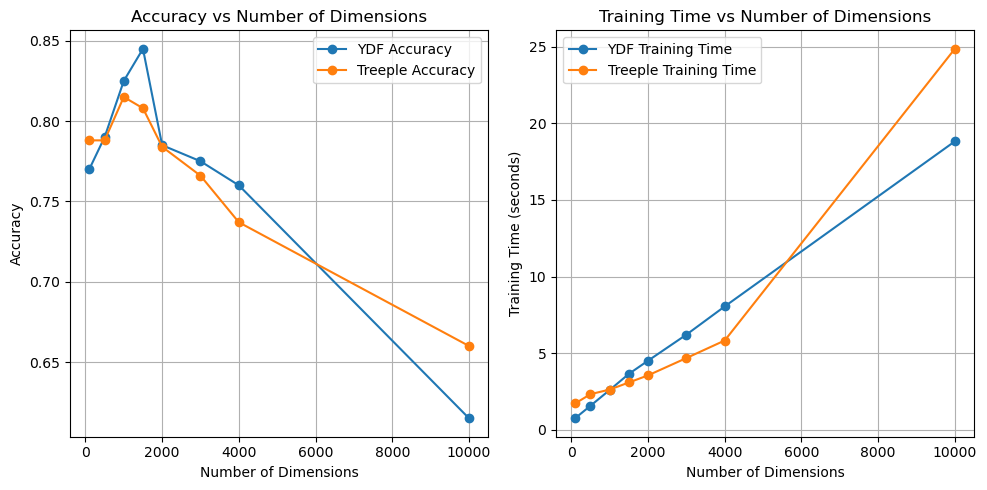

In [64]:


fig, ax1 = plt.subplots(1,2, figsize=(10, 5))

# Plot accuracy
ax1[0].plot(num_dims, accs_ydf, label='YDF Accuracy', marker='o')
ax1[0].plot(num_dims, accs_treeple, label='Treeple Accuracy', marker='o')
ax1[0].set_xlabel('Number of Dimensions')
ax1[0].set_ylabel('Accuracy')
ax1[0].set_title('Accuracy vs Number of Dimensions')
ax1[0].legend()
ax1[0].grid(True)

# Plot training time
ax1[1].plot(num_dims, times_ydf, label='YDF Training Time', marker='o')
ax1[1].plot(num_dims, times_treeple, label='Treeple Training Time', marker='o')
ax1[1].set_xlabel('Number of Dimensions')
ax1[1].set_ylabel('Training Time (seconds)')
ax1[1].set_title('Training Time vs Number of Dimensions')
ax1[1].legend()
ax1[1].grid(True)

plt.tight_layout()
plt.show()

## train with default hyperparameter

In [65]:
# num_dims = [100, 500, 1000, 1500, 2000, 3000, 4000, 10000]
accs_ydf_default = []
times_ydf_default = []
accs_treeple_default = []
times_treeple_default = []
# n_rep = 5

for n_dim in num_dims:
    print(f"Dimension: {n_dim}")

    X, y = make_trunk_classification(n_samples=n_samples, n_dim=n_dim, n_informative=600, seed=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    df_train = prepare_dataframe(X_train, y_train)
    df_test = prepare_dataframe(X_test, y_test)

    # --- Train YDF ---
    acc_temp=0
    time_temp=0
    for _ in range(n_rep):
        
        
        learner = ydf.RandomForestLearner(**params_ydf_default)
        start_time = time.time()
        ydf_model = learner.train(df_train)
        time_ydf = time.time() - start_time
        y_pred = ydf_model.predict(df_test)
        y_pred = (y_pred >= 0.5).astype(int) 

        acc_ydf = accuracy_score(y_test, y_pred)
        acc_temp+=acc_ydf
        time_temp+=time_ydf
    accs_ydf_default.append(acc_temp/n_rep)
    times_ydf_default.append(time_temp/n_rep)

    # --- Train Treeple ---
    acc_temp=0
    time_temp=0
    for _ in range(n_rep):
        treeple_model = ObliqueRandomForestClassifier(**params_treeple_default)
        acc_treeple, time_treeple = train_and_evaluate(treeple_model, "Treeple", X_train, X_test, y_train, y_test)
        acc_temp+=acc_treeple
        time_temp+=time_treeple
    accs_treeple_default.append(acc_temp/n_rep)
    times_treeple_default.append(time_temp/n_rep)

Dimension: 100
Train model on 800 examples
Model trained in 0:00:00.116731


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 100. Setting n_informative to n_dim.
  warnings.warn(


Train model on 800 examples
Model trained in 0:00:00.114712
Train model on 800 examples
Model trained in 0:00:00.096630
Train model on 800 examples
Model trained in 0:00:00.119874
Train model on 800 examples
Model trained in 0:00:00.102908
Treeple: Accuracy = 0.8250, Training Time = 1.3614 sec
Treeple: Accuracy = 0.7800, Training Time = 1.3503 sec
Treeple: Accuracy = 0.8100, Training Time = 1.3545 sec
Treeple: Accuracy = 0.8000, Training Time = 1.3628 sec
Treeple: Accuracy = 0.7900, Training Time = 1.3748 sec
Dimension: 500
Train model on 800 examples


c:\Users\clark\anaconda3\envs\treeple\lib\site-packages\treeple\datasets\hyppo.py:515: RuntimeWarning: Number of informative dimensions {n_informative} must be less than number of dimensions, 500. Setting n_informative to n_dim.
  warnings.warn(


Model trained in 0:00:00.301103
Train model on 800 examples
Model trained in 0:00:00.267104
Train model on 800 examples
Model trained in 0:00:00.270172
Train model on 800 examples
Model trained in 0:00:00.298567
Train model on 800 examples
Model trained in 0:00:00.260217
Treeple: Accuracy = 0.8250, Training Time = 3.7896 sec
Treeple: Accuracy = 0.8150, Training Time = 3.8593 sec
Treeple: Accuracy = 0.8200, Training Time = 3.9541 sec
Treeple: Accuracy = 0.8100, Training Time = 3.9780 sec
Treeple: Accuracy = 0.8000, Training Time = 3.9829 sec
Dimension: 1000
Train model on 800 examples
Model trained in 0:00:00.514437
Train model on 800 examples
Model trained in 0:00:00.585743
Train model on 800 examples
Model trained in 0:00:00.599866
Train model on 800 examples
Model trained in 0:00:00.579885
Train model on 800 examples
Model trained in 0:00:00.555408
Treeple: Accuracy = 0.8200, Training Time = 6.9644 sec
Treeple: Accuracy = 0.8100, Training Time = 6.9646 sec
Treeple: Accuracy = 0.8250,

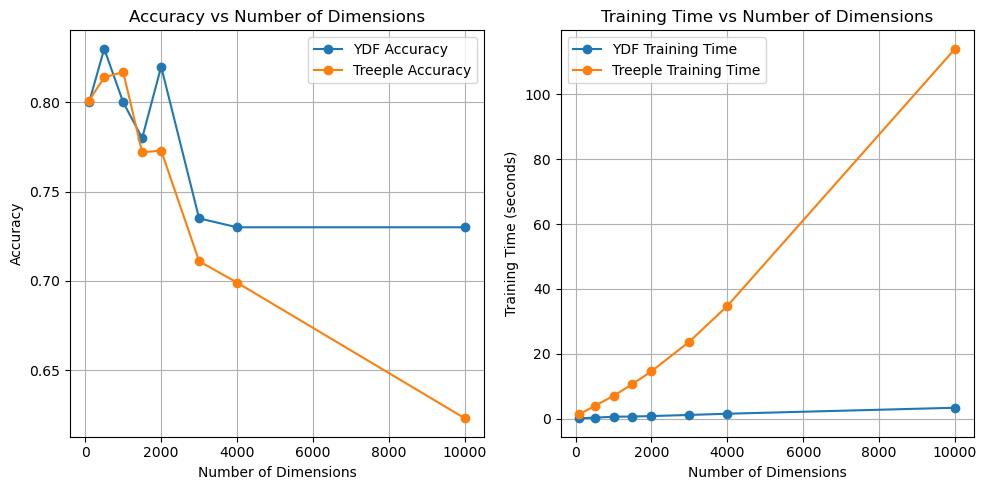

In [66]:
fig, ax1 = plt.subplots(1,2, figsize=(10, 5))

# Plot accuracy
ax1[0].plot(num_dims, accs_ydf_default, label='YDF Accuracy', marker='o')
ax1[0].plot(num_dims, accs_treeple_default, label='Treeple Accuracy', marker='o')
ax1[0].set_xlabel('Number of Dimensions')
ax1[0].set_ylabel('Accuracy')
ax1[0].set_title('Accuracy vs Number of Dimensions')
ax1[0].legend()
ax1[0].grid(True)

# Plot training time
ax1[1].plot(num_dims, times_ydf_default, label='YDF Training Time', marker='o')
ax1[1].plot(num_dims, times_treeple_default, label='Treeple Training Time', marker='o')
ax1[1].set_xlabel('Number of Dimensions')
ax1[1].set_ylabel('Training Time (seconds)')
ax1[1].set_title('Training Time vs Number of Dimensions')
ax1[1].legend()
ax1[1].grid(True)

plt.tight_layout()
plt.show()